In [55]:
import gcp.storage as storage

# Orders

In [2]:
%%sql
SELECT COUNT(*) FROM [datalab-projects-1331:xjk_algo_comp_test.orders]

f0_
1110625


Let's see what dates have orders in the test dataset

In [43]:
%%sql --module orders_by_date
SELECT date, COUNT(*) AS num_orders FROM [datalab-projects-1331:xjk_algo_comp_test.orders]
GROUP BY date
ORDER BY date

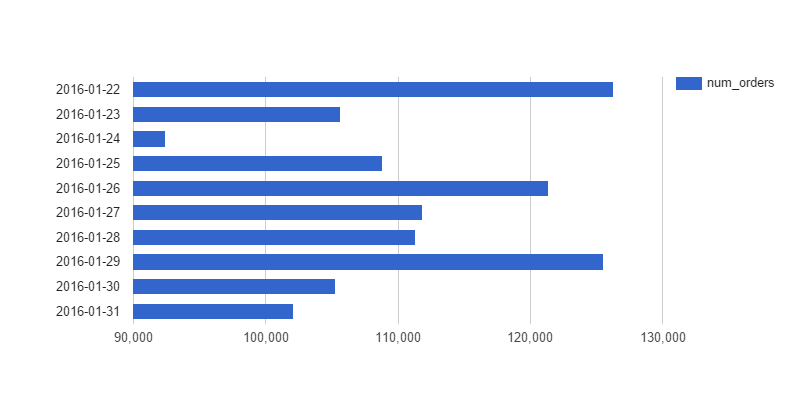

In [44]:
%%chart bars --data orders_by_date
height: 400

In [60]:
item = storage.Item('datalab-projects-1331-datalab','data/timeslots_to_test2.txt')
slots = map(lambda x: x.strip(), item.read_from().strip().split(', '))

AttributeError: 'list' object has no attribute 'split'

In [47]:
%%sql
SELECT date, COUNT(*) AS num_orders, FIRST(day_in_week) AS day_in_week
FROM [datalab-projects-1331:xjk_algo_comp_test.orders]
GROUP BY date
ORDER BY date

date,num_orders,day_in_week
2016-01-22,126309,5
2016-01-23,105634,6
2016-01-24,92437,0
2016-01-25,108791,1
2016-01-26,121362,2
2016-01-27,111815,3
2016-01-28,111343,4
2016-01-29,125552,5
2016-01-30,105278,6
2016-01-31,102104,0


In [36]:
%%sql --module orders_by_timeslot
SELECT FIRST(timeslot), COUNT(*) AS num_orders FROM [datalab-projects-1331:xjk_algo_comp_test.orders]
WHERE date IN ('2016-01-22')
GROUP BY date, timeofday_slot
ORDER BY date, timeofday_slot

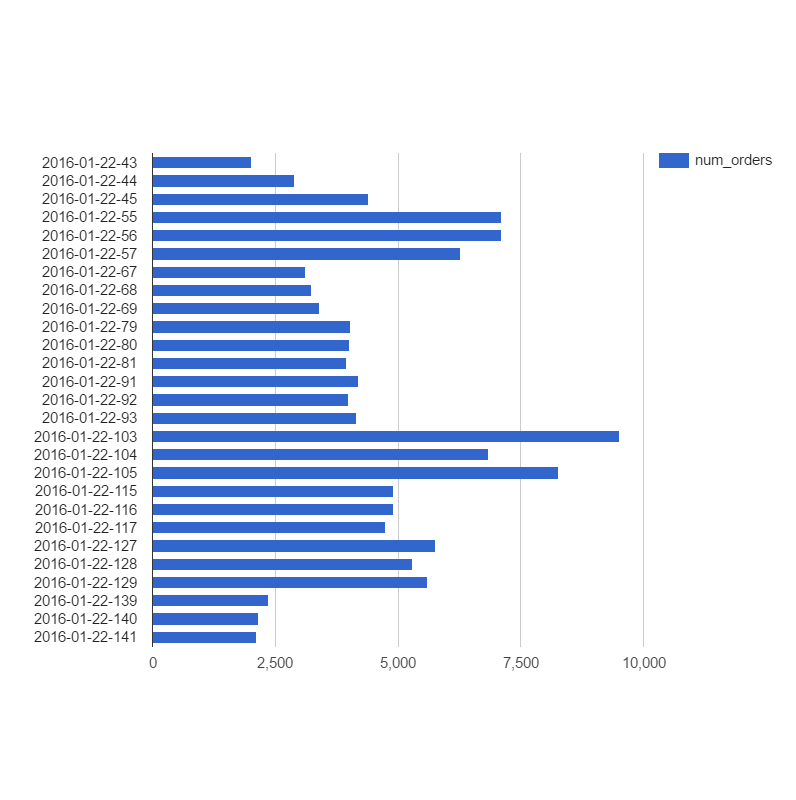

In [49]:
%%chart bars --data orders_by_timeslot
height: 800

In [50]:
%%sql --module orders_by_timeofday_slot
SELECT FIRST(timeslot), COUNT(*) AS num_orders FROM [datalab-projects-1331:xjk_algo_comp_test.orders]
WHERE date IN ('2016-01-23')
GROUP BY date, timeofday_slot
ORDER BY date, timeofday_slot

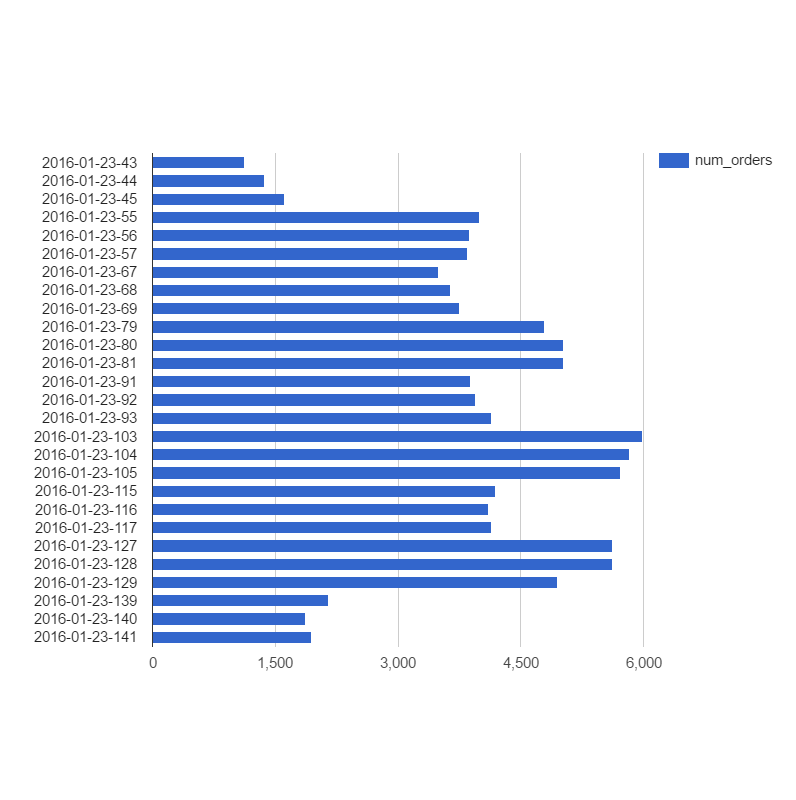

In [51]:
%%chart bars --data orders_by_timeslot2
height: 800

In [52]:
%%sql --module orders_by_timeslot3
SELECT FIRST(timeslot), COUNT(*) AS num_orders FROM [datalab-projects-1331:xjk_algo_comp_test.orders]
WHERE date IN ('2016-01-24')
GROUP BY date, timeofday_slot
ORDER BY date, timeofday_slot

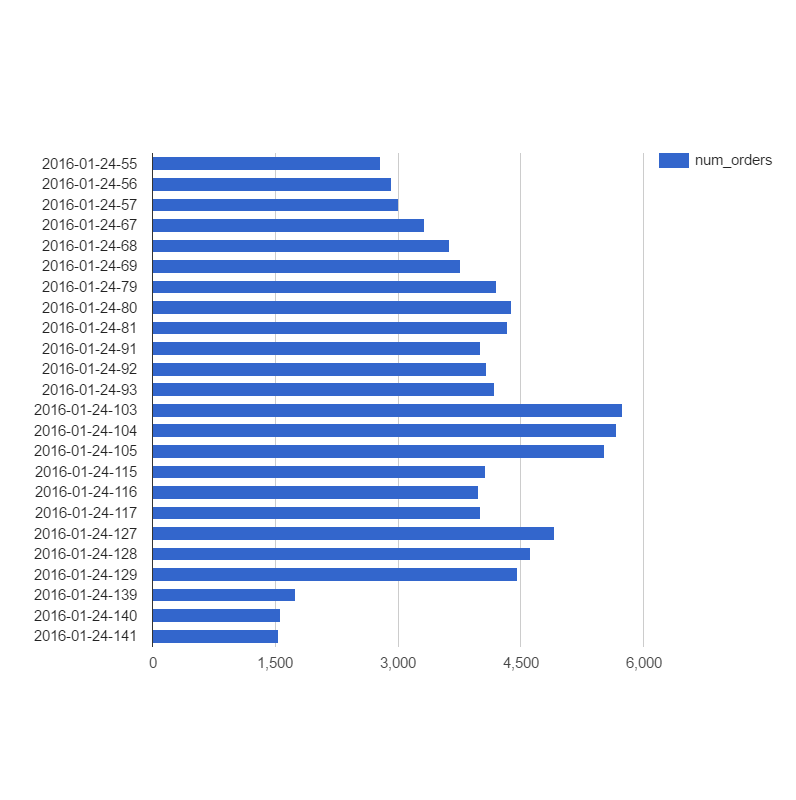

In [53]:
%%chart bars --data orders_by_timeslot3
height: 800

In [1]:
%%sql
SELECT COUNT(*) FROM [datalab-projects-1331:xjk_algo_comp.orders]

f0_
8540614
